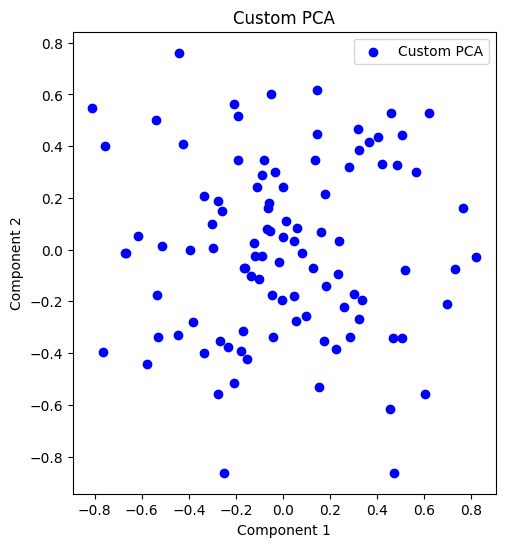

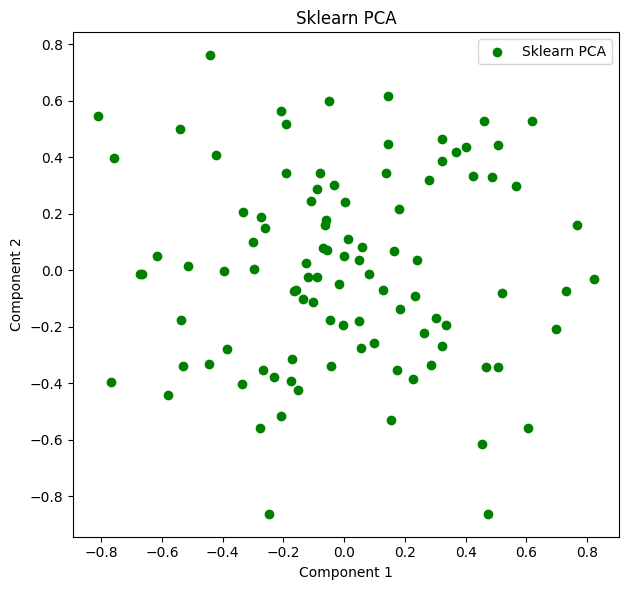

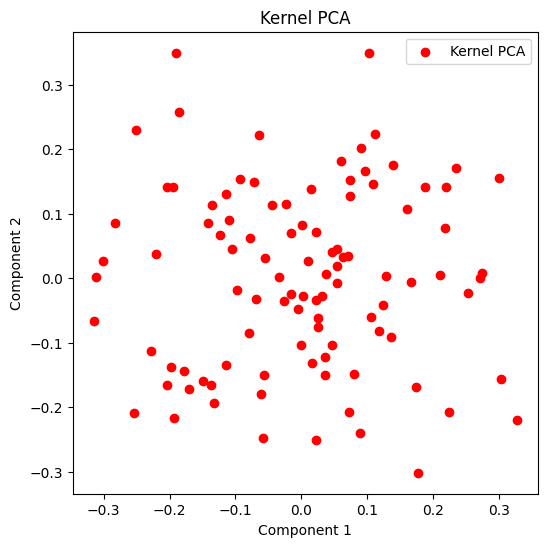

In [1]:
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(42)
data = np.random.rand(100, 10) 

# Normalize 
mean = np.mean(data, axis=0)
centered_data = data - mean

# Covariance 
cov_matrix = np.cov(centered_data, rowvar=False)

# Vectiors
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

# k clusters
k = 2
sorted_indices = np.argsort(eig_values)[::-1]
best_eig_vectors = eig_vectors[:, sorted_indices[:k]]

# New space
data_custom_pca = np.dot(centered_data, best_eig_vectors)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_custom_pca[:, 0], data_custom_pca[:, 1], color='blue', label='Custom PCA')
plt.title('Custom PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()

# Sklearn PCA
pca = PCA(n_components=2)
projected_data_sklearn = pca.fit_transform(data)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(projected_data_sklearn[:, 0], projected_data_sklearn[:, 1], color='green', label='Sklearn PCA')
plt.title('Sklearn PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()

plt.tight_layout()
plt.show()


# Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
projected_data_kernel_pca = kernel_pca.fit_transform(data)

plt.figure(figsize=(6, 6))
plt.scatter(projected_data_kernel_pca[:, 0], projected_data_kernel_pca[:, 1], color='red', label='Kernel PCA')
plt.title('Kernel PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()
